##### This Python 3 environment comes with many helpful analytics libraries installed
##### It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
##### For example, here's several helpful packages to load in

##### another ref that you can use is : https://github.com/glample/tagger/blob/master/model.py

In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

os.chdir("/home/jovyan/work/LSTM")
import SentenceGetter

In [6]:
from subprocess import check_output
print(check_output(["ls", "/home/jovyan/work/data/label_data"]).decode("utf8"))

digitoday.2014.csv
digitoday.2014.dev.csv
digitoday.2014.train.csv
digitoday.2015.test.csv
good.csv
ner---.csv
ner.csv
wikipedia.test.csv



In [7]:
dframe = pd.read_csv("/home/jovyan/work/data/label_data/ner.csv")
dframe.head(10)

,Unnamed: 0,sentence_idx,shape,word,tag
0,0,1.0,capitalized,Thousands,O
1,1,1.0,lowercase,of,O
2,2,1.0,lowercase,demonstrators,O
3,3,1.0,lowercase,have,O
4,4,1.0,lowercase,marched,O
5,5,1.0,lowercase,through,O
6,6,1.0,capitalized,London,B-geo
7,7,1.0,lowercase,to,O
8,8,1.0,lowercase,protest,O
9,9,1.0,lowercase,the,O


In [8]:
class SentenceGetter(object):

    def __init__(self, dataset):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(),
                                                     s["tag"].values.tolist())]
        self.grouped = self.dataset.groupby("sentence_idx").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [9]:
getter = SentenceGetter(dframe)

In [10]:
sentences = getter.sentences

In [11]:
print(sentences[0])

[('Thousands', 'O'), ('of', 'O'), ('demonstrators', 'O'), ('have', 'O'), ('marched', 'O'), ('through', 'O'), ('London', 'B-geo'), ('to', 'O'), ('protest', 'O'), ('the', 'O'), ('war', 'O'), ('in', 'O'), ('Iraq', 'B-geo'), ('and', 'O'), ('demand', 'O'), ('the', 'O'), ('withdrawal', 'O'), ('of', 'O'), ('British', 'B-gpe'), ('troops', 'O'), ('from', 'O'), ('that', 'O'), ('country', 'O'), ('.', 'O'), ('Thousands', 'O'), ('of', 'O'), ('demonstrators', 'O'), ('have', 'O'), ('marched', 'O'), ('through', 'O'), ('London', 'B-geo'), ('to', 'O'), ('protest', 'O'), ('the', 'O'), ('war', 'O'), ('in', 'O'), ('Iraq', 'B-geo'), ('and', 'O'), ('demand', 'O'), ('the', 'O'), ('withdrawal', 'O'), ('of', 'O'), ('British', 'B-gpe'), ('troops', 'O'), ('from', 'O'), ('that', 'O'), ('country', 'O'), ('.', 'O')]


In [12]:
maxlen = max([len(s) for s in sentences])
print ('Maximum sequence length:', maxlen)

Maximum sequence length: 140


In [16]:
# Check how long sentences are so that we can pad them
%matplotlib inline
plt.style.use("ggplot")

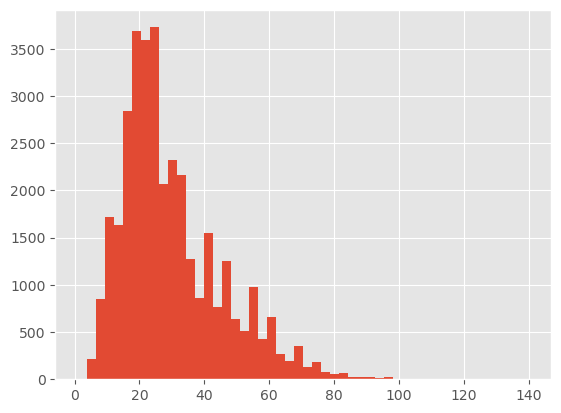

In [17]:
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [18]:
words = list(set(dframe["word"].values))
words.append("ENDPAD")

In [19]:
n_words = len(words); n_words

30173

In [20]:
tags = list(set(dframe["tag"].values))
tags

['I-tim',
 'I-art',
 'I-nat',
 'I-per',
 'I-geo',
 'B-gpe',
 'B-geo',
 'I-org',
 'B-art',
 'B-nat',
 'I-eve',
 'B-per',
 'I-gpe',
 'O',
 'B-eve',
 'B-tim',
 'B-org',
 nan]

In [22]:
n_tags = len(tags); n_tags

18

In [23]:
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [24]:
word2idx['Obama']

25058

In [25]:
tag2idx["O"]

13

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

ModuleNotFoundError: No module named 'tensorflow'

In [32]:
X = [[word2idx[w[0]] for w in s] for s in sentences]

In [33]:
X = pad_sequences(maxlen=140, sequences=X, padding="post",value=n_words - 1)

NameError: name 'pad_sequences' is not defined